In [91]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder

from sklearn.feature_selection import SelectKBest, chi2

from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split

In [92]:
data=pd.read_csv("cancer patient data sets.csv")
data.head()

,index,Patient Id,Age,Gender,Air Pollution,Alcohol use,Dust Allergy,OccuPational Hazards,Genetic Risk,chronic Lung Disease,...,Fatigue,Weight Loss,Shortness of Breath,Wheezing,Swallowing Difficulty,Clubbing of Finger Nails,Frequent Cold,Dry Cough,Snoring,Level
0,0,P1,33,1,2,4,5,4,3,2,...,3,4,2,2,3,1,2,3,4,Low
1,1,P10,17,1,3,1,5,3,4,2,...,1,3,7,8,6,2,1,7,2,Medium
2,2,P100,35,1,4,5,6,5,5,4,...,8,7,9,2,1,4,6,7,2,High
3,3,P1000,37,1,7,7,7,7,6,7,...,4,2,3,1,4,5,6,7,5,High
4,4,P101,46,1,6,8,7,7,7,6,...,3,2,4,1,4,2,4,2,3,High


In [93]:
# General information
print("Shape of the dataset:", data.shape)
print("\nColumns and data types:")
print(data.dtypes)

Shape of the dataset: (1000, 26)

Columns and data types:
index                        int64
Patient Id                  object
Age                          int64
Gender                       int64
Air Pollution                int64
Alcohol use                  int64
Dust Allergy                 int64
OccuPational Hazards         int64
Genetic Risk                 int64
chronic Lung Disease         int64
Balanced Diet                int64
Obesity                      int64
Smoking                      int64
Passive Smoker               int64
Chest Pain                   int64
Coughing of Blood            int64
Fatigue                      int64
Weight Loss                  int64
Shortness of Breath          int64
Wheezing                     int64
Swallowing Difficulty        int64
Clubbing of Finger Nails     int64
Frequent Cold                int64
Dry Cough                    int64
Snoring                      int64
Level                       object
dtype: object


In [94]:
# Summary statistics
print("\nSummary statistics:")
data.describe()


Summary statistics:


,index,Age,Gender,Air Pollution,Alcohol use,Dust Allergy,OccuPational Hazards,Genetic Risk,chronic Lung Disease,Balanced Diet,...,Coughing of Blood,Fatigue,Weight Loss,Shortness of Breath,Wheezing,Swallowing Difficulty,Clubbing of Finger Nails,Frequent Cold,Dry Cough,Snoring
count,1000.000000,1000.000000,1000.000000,1000.0000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,...,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,499.500000,37.174000,1.402000,3.8400,4.563000,5.165000,4.840000,4.580000,4.380000,4.491000,...,4.859000,3.856000,3.855000,4.240000,3.777000,3.746000,3.923000,3.536000,3.853000,2.926000
std,288.819436,12.005493,0.490547,2.0304,2.620477,1.980833,2.107805,2.126999,1.848518,2.135528,...,2.427965,2.244616,2.206546,2.285087,2.041921,2.270383,2.388048,1.832502,2.039007,1.474686
min,0.000000,14.000000,1.000000,1.0000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
25%,249.750000,27.750000,1.000000,2.0000,2.000000,4.000000,3.000000,2.000000,3.000000,2.000000,...,3.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000
50%,499.500000,36.000000,1.000000,3.0000,5.000000,6.000000,5.000000,5.000000,4.000000,4.000000,...,4.000000,3.000000,3.000000,4.000000,4.000000,4.000000,4.000000,3.000000,4.000000,3.000000
75%,749.250000,45.000000,2.000000,6.0000,7.000000,7.000000,7.000000,7.000000,6.000000,7.000000,...,7.000000,5.000000,6.000000,6.000000,5.000000,5.000000,5.000000,5.000000,6.000000,4.000000
max,999.000000,73.000000,2.000000,8.0000,8.000000,8.000000,8.000000,7.000000,7.000000,7.000000,...,9.000000,9.000000,8.000000,9.000000,8.000000,8.000000,9.000000,7.000000,7.000000,7.000000


In [95]:
# Check for missing values
print("\nMissing values:")
print(data.isnull().sum())


Missing values:
index                       0
Patient Id                  0
Age                         0
Gender                      0
Air Pollution               0
Alcohol use                 0
Dust Allergy                0
OccuPational Hazards        0
Genetic Risk                0
chronic Lung Disease        0
Balanced Diet               0
Obesity                     0
Smoking                     0
Passive Smoker              0
Chest Pain                  0
Coughing of Blood           0
Fatigue                     0
Weight Loss                 0
Shortness of Breath         0
Wheezing                    0
Swallowing Difficulty       0
Clubbing of Finger Nails    0
Frequent Cold               0
Dry Cough                   0
Snoring                     0
Level                       0
dtype: int64


C:\Users\0945\AppData\Local\Temp\ipykernel_20412\539241355.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Level', data=data, palette='viridis')


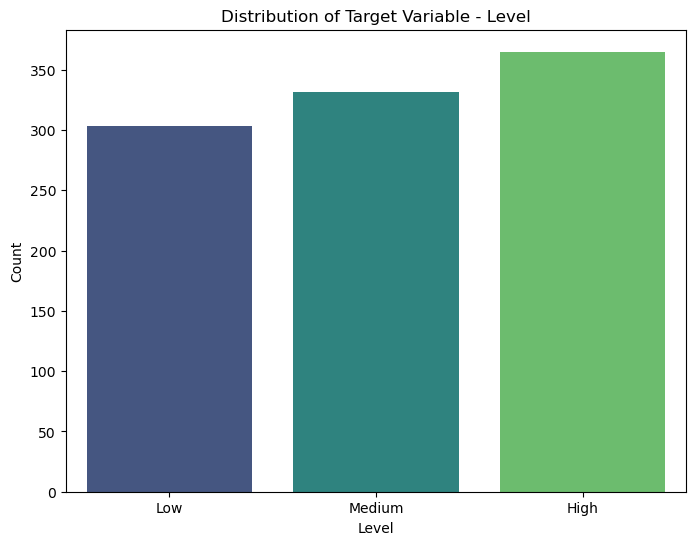

In [96]:
# Check target distribution
plt.figure(figsize=(8, 6))
sns.countplot(x='Level', data=data, palette='viridis')
plt.title('Distribution of Target Variable - Level')
plt.xlabel('Level')
plt.ylabel('Count')
plt.show()

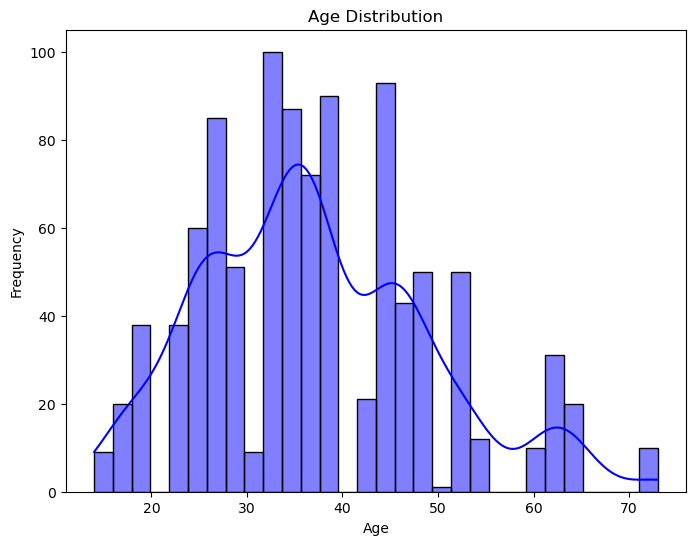

In [97]:
# Age distribution
plt.figure(figsize=(8, 6))
sns.histplot(data['Age'], kde=True, bins=30, color='blue')
plt.title('Age Distribution')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()

C:\Users\0945\AppData\Local\Temp\ipykernel_20412\2066285738.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Level', y='Age', data=data, palette='Set2')


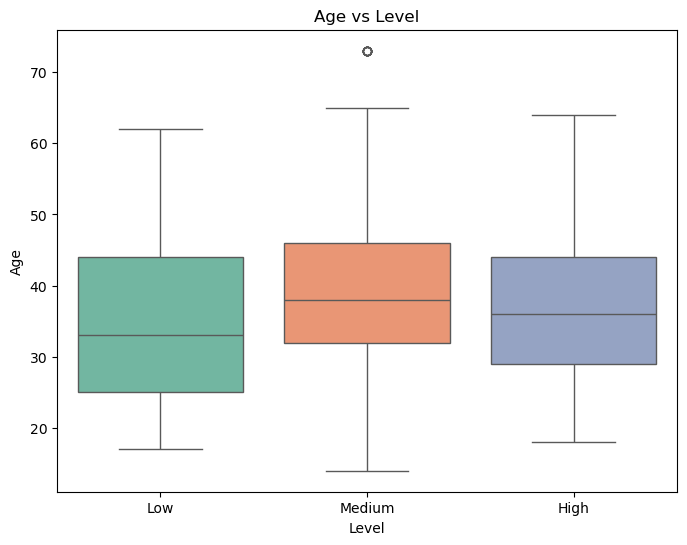

In [98]:
# Boxplot for Age vs Level
plt.figure(figsize=(8, 6))
sns.boxplot(x='Level', y='Age', data=data, palette='Set2')
plt.title('Age vs Level')
plt.xlabel('Level')
plt.ylabel('Age')
plt.show()


C:\Users\0945\AppData\Local\Temp\ipykernel_20412\2539154404.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Gender', data=data, palette='pastel')


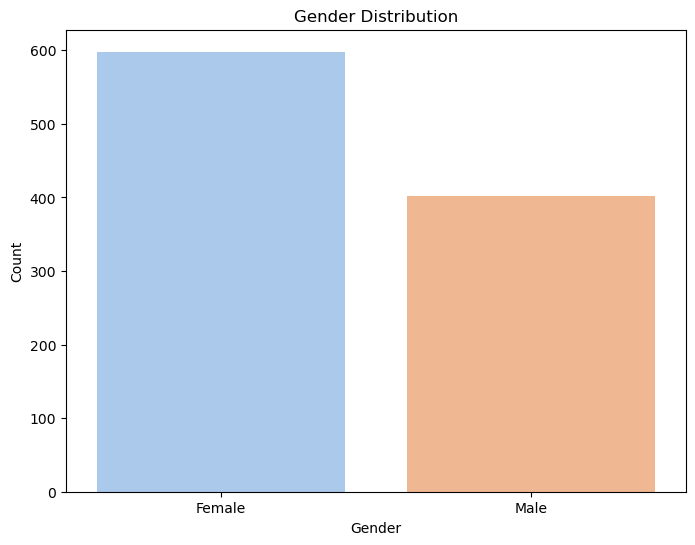

In [99]:
# Gender distribution
plt.figure(figsize=(8, 6))
sns.countplot(x='Gender', data=data, palette='pastel')
plt.title('Gender Distribution')
plt.xlabel('Gender')
plt.ylabel('Count')
plt.xticks([0, 1], ['Female', 'Male'])
plt.show()


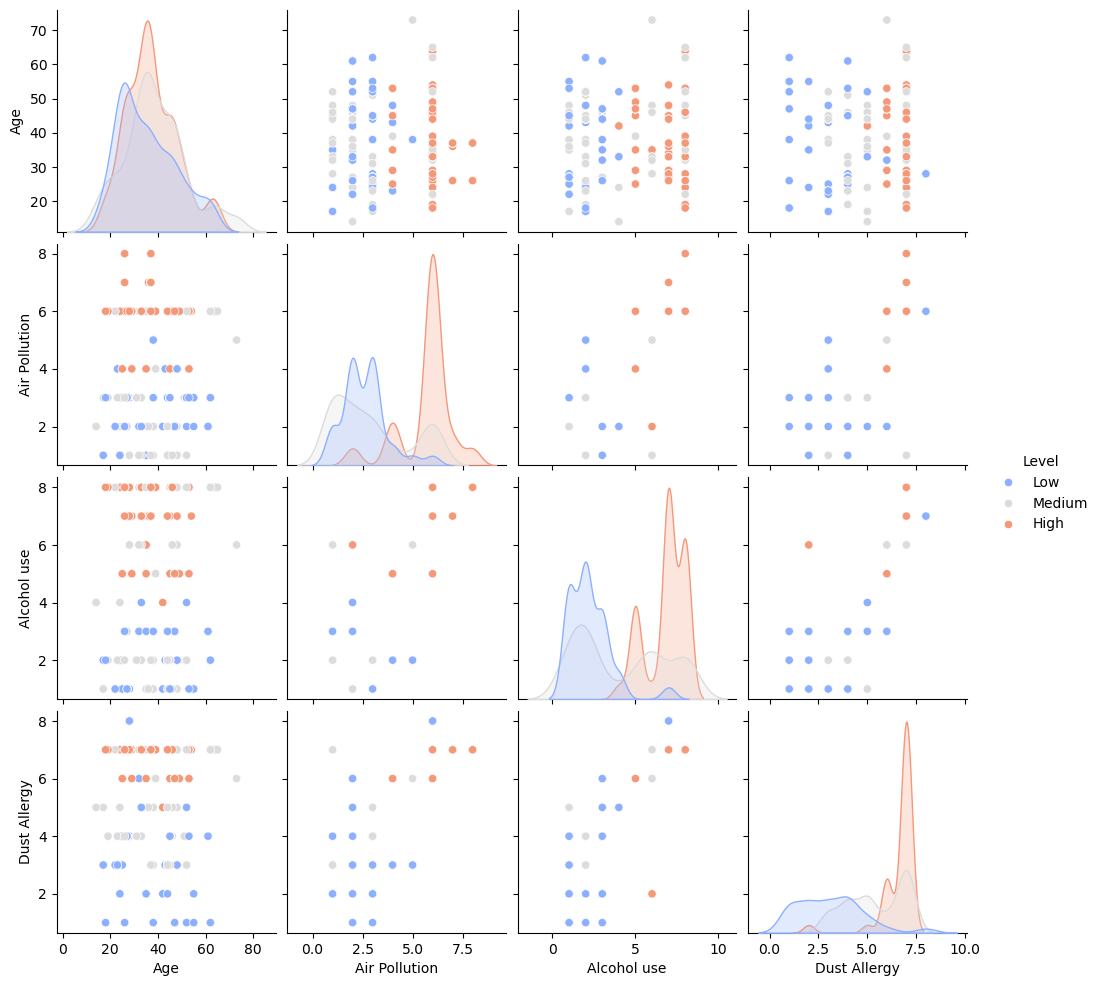

In [100]:
# Pairplot for selected features
selected_features = ['Age', 'Air Pollution', 'Alcohol use', 'Dust Allergy', 'Level']
sns.pairplot(data[selected_features], hue='Level', palette='coolwarm')
plt.show()

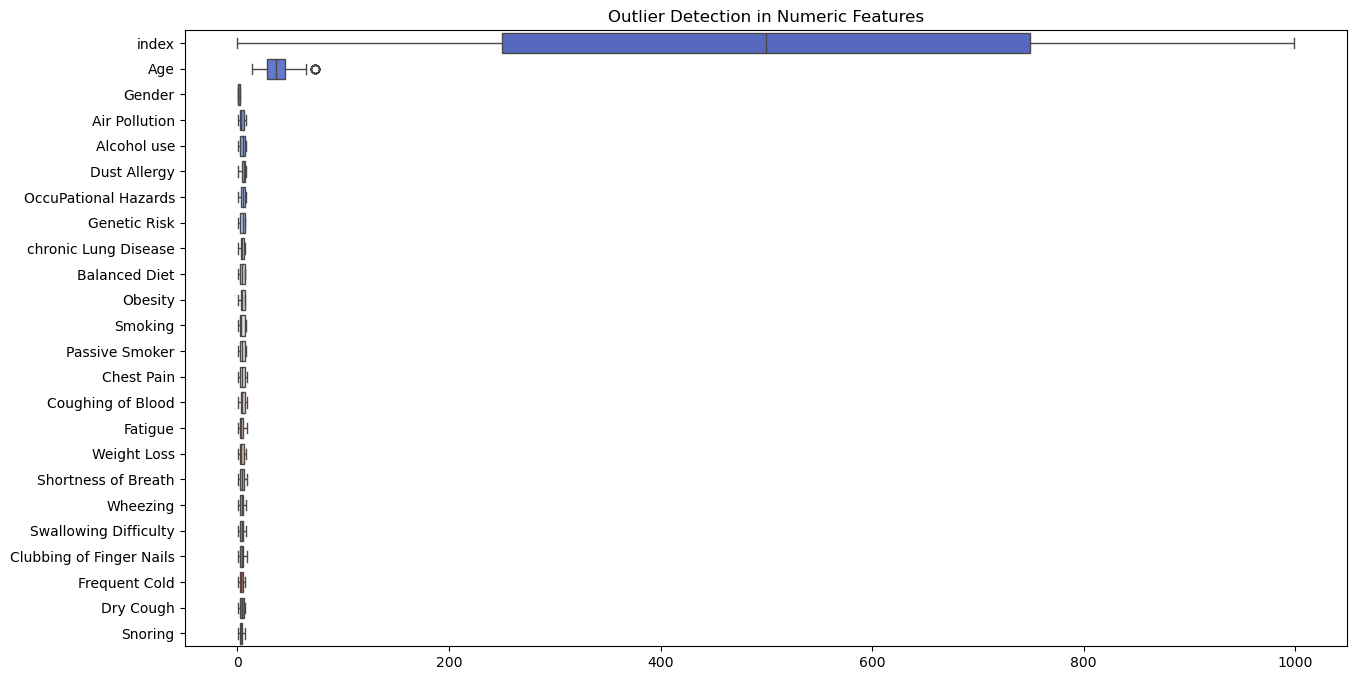

In [101]:
# Outliers detection
plt.figure(figsize=(15, 8))
sns.boxplot(data=data.select_dtypes(include=['int64']), orient='h', palette='coolwarm')
plt.title('Outlier Detection in Numeric Features')
plt.show()

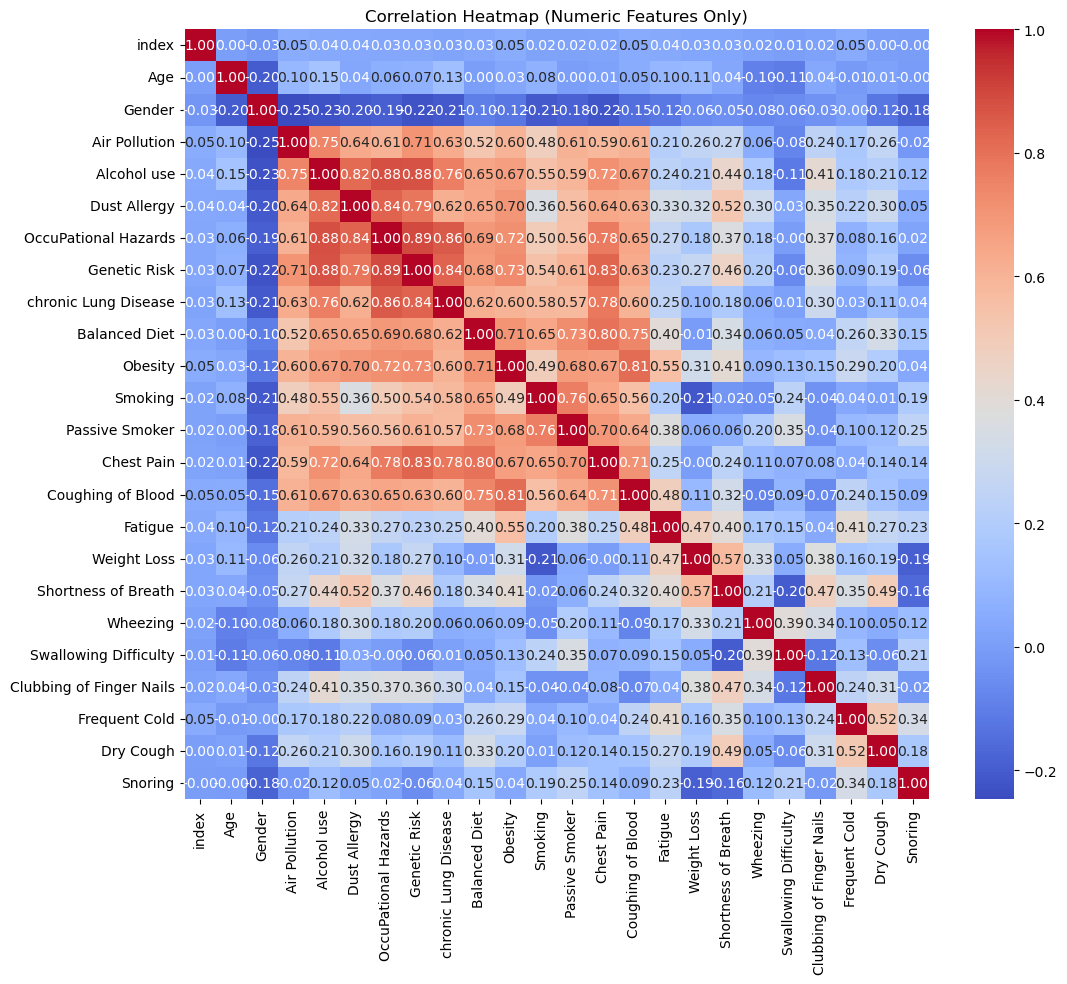

In [102]:
# Correlation heatmap with numeric data only
plt.figure(figsize=(12, 10))
numeric_data = data.select_dtypes(include=['int64', 'float64'])
correlation_matrix = numeric_data.corr()
sns.heatmap(correlation_matrix, annot=True, fmt='.2f', cmap='coolwarm', cbar=True)
plt.title('Correlation Heatmap (Numeric Features Only)')
plt.show()


In [103]:
# Drop unnecessary columns
data = data.drop(columns=['index', 'Patient Id'])

In [104]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 24 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Age                       1000 non-null   int64 
 1   Gender                    1000 non-null   int64 
 2   Air Pollution             1000 non-null   int64 
 3   Alcohol use               1000 non-null   int64 
 4   Dust Allergy              1000 non-null   int64 
 5   OccuPational Hazards      1000 non-null   int64 
 6   Genetic Risk              1000 non-null   int64 
 7   chronic Lung Disease      1000 non-null   int64 
 8   Balanced Diet             1000 non-null   int64 
 9   Obesity                   1000 non-null   int64 
 10  Smoking                   1000 non-null   int64 
 11  Passive Smoker            1000 non-null   int64 
 12  Chest Pain                1000 non-null   int64 
 13  Coughing of Blood         1000 non-null   int64 
 14  Fatigue                  

In [105]:
# Label encode categorical variables
label_encoder = LabelEncoder()
data['Level'] = label_encoder.fit_transform(data['Level'])


In [106]:
# Assuming 'data' is your DataFrame and 'Level' is the target column
X = data.drop(columns=['Level'])  # Features
y = data['Level']  # Target

In [107]:
# Initialize the SMOTE object
smote = SMOTE(random_state=42)

# Resample the training data to balance the classes
X_resampled, y_resampled = smote.fit_resample(X, y)

# Verify the resampled data shape
print(f"Original dataset shape:\n{pd.Series(y).value_counts()}")
print(f"Resampled dataset shape:\n{pd.Series(y_resampled).value_counts()}")


Original dataset shape:
Level
0    365
2    332
1    303
Name: count, dtype: int64
Resampled dataset shape:
Level
1    365
2    365
0    365
Name: count, dtype: int64


In [108]:
# Split the resampled data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.2, random_state=42)

In [109]:
# SelectKBest for feature selection
k = 10 
select_k_best = SelectKBest(score_func=chi2, k=k)
X_train_selected = select_k_best.fit_transform(X_train, y_train)

In [110]:
# Get selected feature names
selected_features = X_train.columns[select_k_best.get_support()]

# Display the selected features
print("Selected Features using SelectKBest:")
print(selected_features)

Selected Features using SelectKBest:
Index(['Air Pollution', 'Alcohol use', 'Genetic Risk', 'Balanced Diet',
       'Obesity', 'Smoking', 'Passive Smoker', 'Chest Pain',
       'Coughing of Blood', 'Fatigue'],
      dtype='object')


In [111]:
# Scores and feature support from SelectKBest
feature_scores = select_k_best.scores_
feature_support = select_k_best.get_support()

In [112]:
# Filter scores for selected features
selected_feature_scores = np.array(feature_scores)[feature_support]
selected_feature_names = X_train.columns[feature_support]

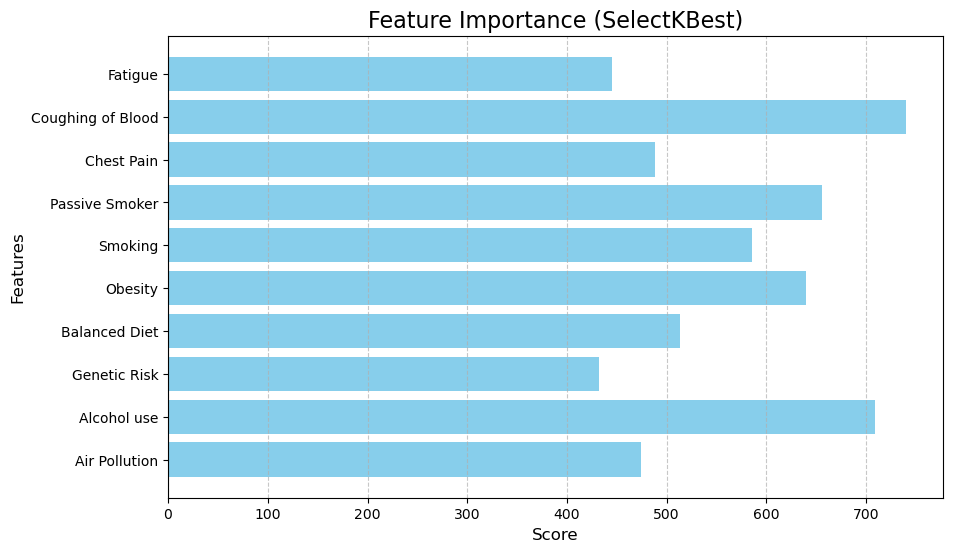

In [113]:
# Plotting the feature importance
plt.figure(figsize=(10, 6))
plt.barh(selected_feature_names, selected_feature_scores, color='skyblue')
plt.title('Feature Importance (SelectKBest)', fontsize=16)
plt.xlabel('Score', fontsize=12)
plt.ylabel('Features', fontsize=12)
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.show()

In [114]:
from sklearn.preprocessing import StandardScaler
import joblib

# Selected features
selected_features = [
    'Air Pollution', 'Alcohol use', 'Genetic Risk', 'Balanced Diet',
    'Obesity', 'Smoking', 'Passive Smoker', 'Chest Pain',
    'Coughing of Blood', 'Fatigue'
]

# Keep only the selected features
X_selected = X_resampled[selected_features]

# Standardization
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_selected)

# Save the scaler object
scaler_filename = 'scaler.pkl'
joblib.dump(scaler, scaler_filename)

print(f"Scaler saved as {scaler_filename}")


Scaler saved as scaler.pkl


In [115]:
# Split data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y_resampled, test_size=0.2, random_state=42)


In [116]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((876, 10), (219, 10), (876,), (219,))

In [117]:
# Initialize and train the Random Forest model
rf_model = RandomForestClassifier(random_state=42,max_depth=5)
rf_model.fit(X_train, y_train)


,n_estimators,100
,criterion,'gini'
,max_depth,5
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,'sqrt'
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,bootstrap,True
,oob_score,False


In [118]:
# Predict on test data
y_pred = rf_model.predict(X_test)


In [119]:
# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='weighted') 
recall = recall_score(y_test, y_pred, average='weighted')  
f1 = f1_score(y_test, y_pred, average='weighted')  
conf_matrix = confusion_matrix(y_test, y_pred)

# Print evaluation criteria
print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1-Score: {f1:.4f}")


Accuracy: 0.9817
Precision: 0.9827
Recall: 0.9817
F1-Score: 0.9817


In [120]:
from sklearn.metrics import classification_report, confusion_matrix


In [121]:
# Print the classification report
print("Classification Report:")
print(classification_report(y_test, y_pred))


Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        70
           1       0.95      1.00      0.97        75
           2       1.00      0.95      0.97        74

    accuracy                           0.98       219
   macro avg       0.98      0.98      0.98       219
weighted avg       0.98      0.98      0.98       219



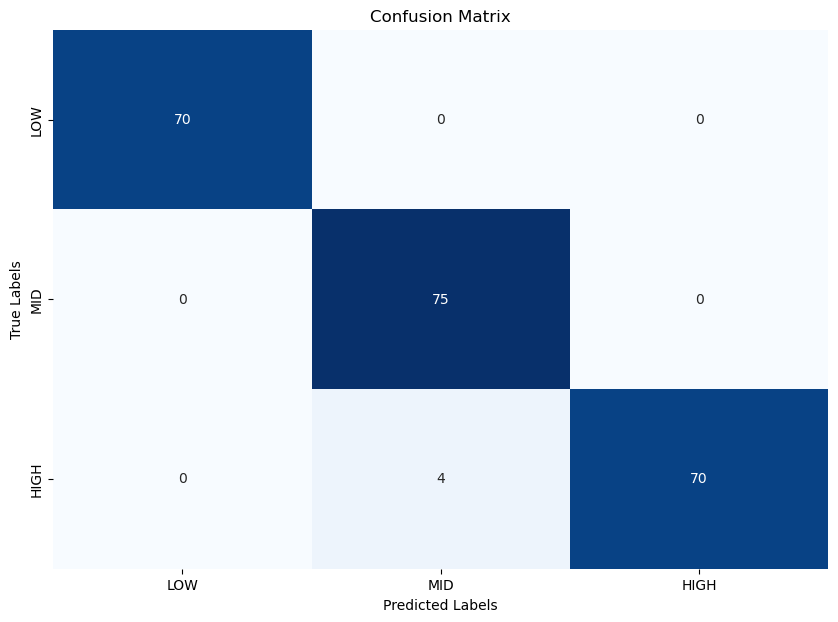

In [122]:
# Confusion Matrix Visualization
plt.figure(figsize=(10, 7))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', cbar=False, 
            xticklabels=['LOW', 'MID', 'HIGH'],
            yticklabels=['LOW', 'MID', 'HIGH'])
plt.title("Confusion Matrix")
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.show()

In [123]:
# Save the model
model_filename = 'random_forest_model.pkl'
joblib.dump(rf_model, model_filename)

['random_forest_model.pkl']

In [124]:
import xgboost as xgb

# Initialize and train the XGBoost model
xgb_model = xgb.XGBClassifier(random_state=42)
xgb_model.fit(X_train, y_train)

# Predict on test data
y_pred_xgb = xgb_model.predict(X_test)

In [125]:
# Evaluate the XGBoost model
accuracy_xgb = accuracy_score(y_test, y_pred_xgb)
precision_xgb = precision_score(y_test, y_pred_xgb, average='weighted')  # For multi-class, use 'weighted'
recall_xgb = recall_score(y_test, y_pred_xgb, average='weighted')  # For multi-class, use 'weighted'
f1_xgb = f1_score(y_test, y_pred_xgb, average='weighted')  # For multi-class, use 'weighted'
conf_matrix_xgb = confusion_matrix(y_test, y_pred_xgb)

In [126]:
# Print the classification report for XGBoost
print("XGBoost Classification Report:")
print(classification_report(y_test, y_pred_xgb))

XGBoost Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        70
           1       1.00      1.00      1.00        75
           2       1.00      1.00      1.00        74

    accuracy                           1.00       219
   macro avg       1.00      1.00      1.00       219
weighted avg       1.00      1.00      1.00       219



In [127]:
# Print evaluation criteria for XGBoost
print(f"XGBoost Accuracy: {accuracy_xgb:.4f}")
print(f"XGBoost Precision: {precision_xgb:.4f}")
print(f"XGBoost Recall: {recall_xgb:.4f}")
print(f"XGBoost F1-Score: {f1_xgb:.4f}")

XGBoost Accuracy: 1.0000
XGBoost Precision: 1.0000
XGBoost Recall: 1.0000
XGBoost F1-Score: 1.0000


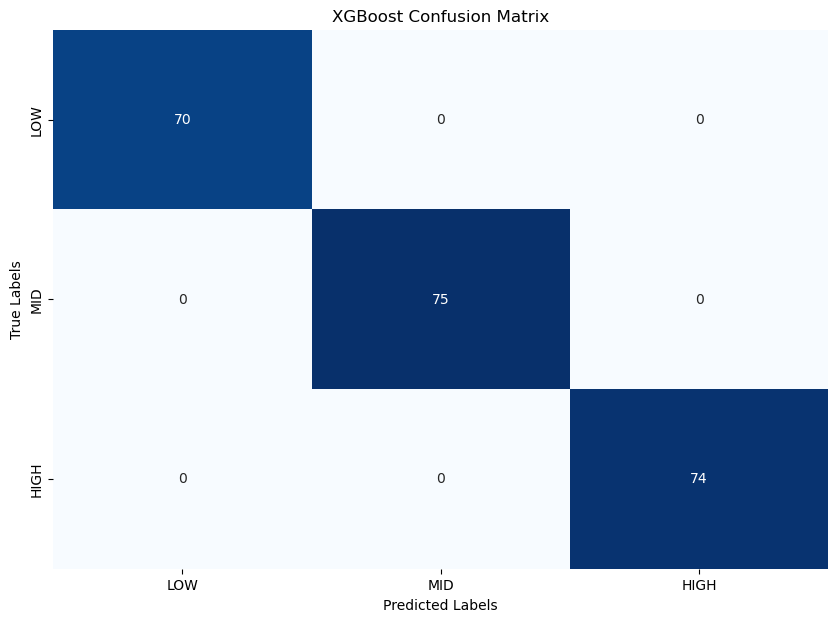

In [128]:
# Confusion Matrix Visualization for XGBoost
plt.figure(figsize=(10, 7))
sns.heatmap(conf_matrix_xgb, annot=True, fmt='d', cmap='Blues', cbar=False, 
            xticklabels=['LOW', 'MID', 'HIGH'],
            yticklabels=['LOW', 'MID', 'HIGH'])
plt.title("XGBoost Confusion Matrix")
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.show()

In [129]:
# Save the XGBoost model
xgb_model_filename = 'xgboost_model.pkl'
joblib.dump(xgb_model, xgb_model_filename)

print(f"XGBoost model saved as {xgb_model_filename}")

XGBoost model saved as xgboost_model.pkl


In [130]:
from sklearn.ensemble import RandomForestClassifier, VotingClassifier

In [131]:
# Initialize the classifiers
rf_model = RandomForestClassifier(random_state=42,max_depth=5)
xgb_model = xgb.XGBClassifier(random_state=42)

# Create the Voting Classifier (hard voting in this case)
voting_model = VotingClassifier(estimators=[('rf', rf_model), ('xgb', xgb_model)], voting='hard')

# Train the Voting Classifier
voting_model.fit(X_train, y_train)

# Predict on test data
y_pred_voting = voting_model.predict(X_test)

In [132]:
# Evaluate the Voting Classifier
accuracy_voting = accuracy_score(y_test, y_pred_voting)
precision_voting = precision_score(y_test, y_pred_voting, average='weighted')  # For multi-class, use 'weighted'
recall_voting = recall_score(y_test, y_pred_voting, average='weighted')  # For multi-class, use 'weighted'
f1_voting = f1_score(y_test, y_pred_voting, average='weighted')  # For multi-class, use 'weighted'
conf_matrix_voting = confusion_matrix(y_test, y_pred_voting)

# Print the classification report for Voting Classifier
print("Voting Classifier Classification Report:")
print(classification_report(y_test, y_pred_voting))

Voting Classifier Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        70
           1       0.95      1.00      0.97        75
           2       1.00      0.95      0.97        74

    accuracy                           0.98       219
   macro avg       0.98      0.98      0.98       219
weighted avg       0.98      0.98      0.98       219



In [133]:
# Print evaluation criteria for Voting Classifier
print(f"Voting Classifier Accuracy: {accuracy_voting:.4f}")
print(f"Voting Classifier Precision: {precision_voting:.4f}")
print(f"Voting Classifier Recall: {recall_voting:.4f}")
print(f"Voting Classifier F1-Score: {f1_voting:.4f}")

Voting Classifier Accuracy: 0.9817
Voting Classifier Precision: 0.9827
Voting Classifier Recall: 0.9817
Voting Classifier F1-Score: 0.9817


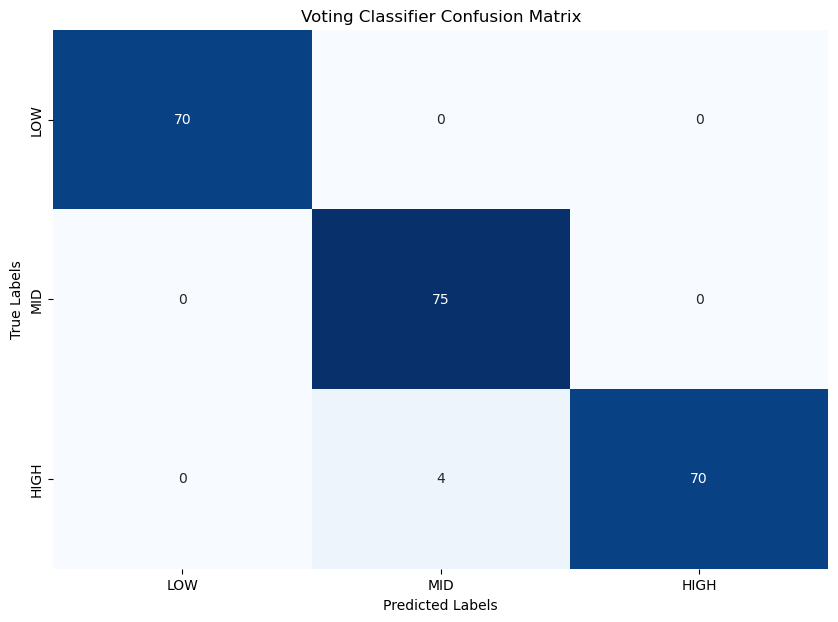

In [134]:
# Confusion Matrix Visualization for Voting Classifier
plt.figure(figsize=(10, 7))
sns.heatmap(conf_matrix_voting, annot=True, fmt='d', cmap='Blues', cbar=False, 
            xticklabels=['LOW', 'MID', 'HIGH'],
            yticklabels=['LOW', 'MID', 'HIGH'])
plt.title("Voting Classifier Confusion Matrix")
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.show()

In [135]:
# Save the Voting Classifier model
voting_model_filename = 'voting_classifier_model.pkl'
joblib.dump(voting_model, voting_model_filename)

print(f"Voting Classifier model saved as {voting_model_filename}")

Voting Classifier model saved as voting_classifier_model.pkl


In [136]:
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix

# Initialize and train the SVM model
svm_model = SVC(random_state=42)
svm_model.fit(X_train, y_train)

# Predict on test data
y_pred = svm_model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='weighted') 
recall = recall_score(y_test, y_pred, average='weighted')
f1 = f1_score(y_test, y_pred, average='weighted')  
conf_matrix = confusion_matrix(y_test, y_pred)

# Print evaluation criteria
print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1-Score: {f1:.4f}")
print("Confusion Matrix:")
print(conf_matrix)


Accuracy: 1.0000
Precision: 1.0000
Recall: 1.0000
F1-Score: 1.0000
Confusion Matrix:
[[70  0  0]
 [ 0 75  0]
 [ 0  0 74]]


In [137]:
import joblib
# Save the model to a file using joblib
joblib.dump(svm_model, 'svm_model.joblib')

['svm_model.joblib']

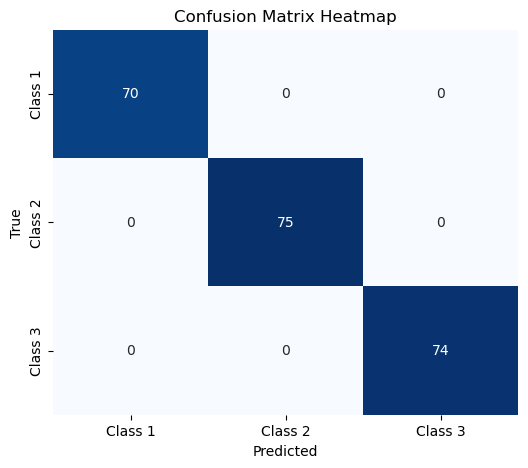

In [138]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Confusion matrix
conf_matrix = np.array([[70, 0, 0],
                        [0, 75, 0],
                        [0, 0, 74]])

# Plot heatmap
plt.figure(figsize=(6, 5))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", cbar=False, xticklabels=["Class 1", "Class 2", "Class 3"], yticklabels=["Class 1", "Class 2", "Class 3"])

# Labels and title
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix Heatmap')

plt.show()


In [139]:
from sklearn.ensemble import AdaBoostClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix

# Initialize and train the AdaBoost model
adaboost_model = AdaBoostClassifier(random_state=42)
adaboost_model.fit(X_train, y_train)

# Predict on test data
y_pred = adaboost_model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='weighted')  
recall = recall_score(y_test, y_pred, average='weighted')  
f1 = f1_score(y_test, y_pred, average='weighted')  
conf_matrix = confusion_matrix(y_test, y_pred)

# Print evaluation criteria
print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1-Score: {f1:.4f}")
print("Confusion Matrix:")
print(conf_matrix)

Accuracy: 0.9863
Precision: 0.9868
Recall: 0.9863
F1-Score: 0.9863
Confusion Matrix:
[[70  0  0]
 [ 0 72  3]
 [ 0  0 74]]


In [140]:
import joblib
# Save the model to a file using joblib
joblib.dump(adaboost_model, 'adaboost_model.joblib')

['adaboost_model.joblib']

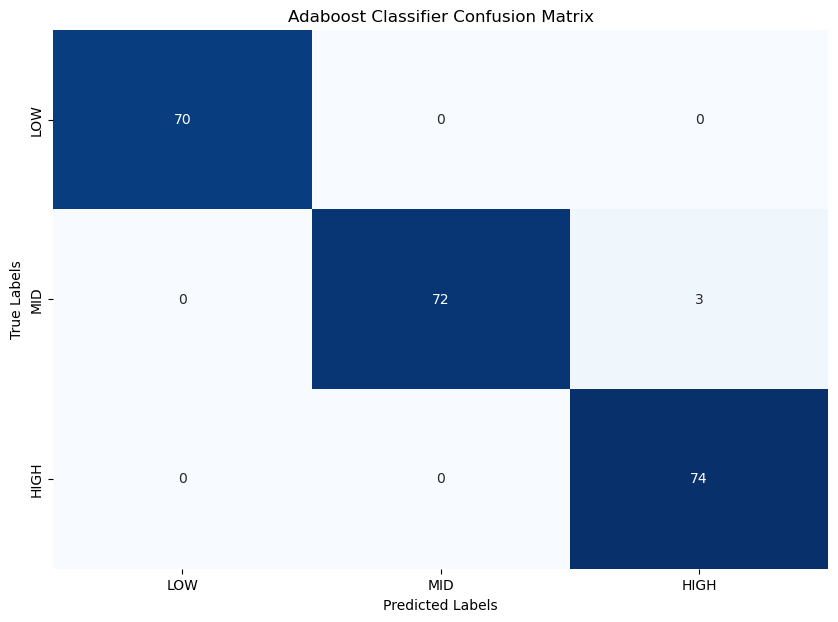

In [141]:
# Confusion Matrix Visualization for Voting Classifier
plt.figure(figsize=(10, 7))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', cbar=False, 
            xticklabels=['LOW', 'MID', 'HIGH'],
            yticklabels=['LOW', 'MID', 'HIGH'])
plt.title("Adaboost Classifier Confusion Matrix")
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.show()

In [143]:
"""
[2, 4, 3, 2, 4, 3, 2, 2, 4, 3],
        [3, 1, 4, 2, 2, 2, 4, 2, 3, 1],
        [4, 5, 5, 6, 7, 2, 3, 4, 8, 8],
        [7, 7, 6, 7, 7, 7, 7, 7, 8, 4],
        [6, 8, 7, 7, 7, 8, 7, 7, 9, 3]

"""

'\n[2, 4, 3, 2, 4, 3, 2, 2, 4, 3],\n        [3, 1, 4, 2, 2, 2, 4, 2, 3, 1],\n        [4, 5, 5, 6, 7, 2, 3, 4, 8, 8],\n        [7, 7, 6, 7, 7, 7, 7, 7, 8, 4],\n        [6, 8, 7, 7, 7, 8, 7, 7, 9, 3]\n\n'